# Basic Streams Sample

The basic cells needed are included below.  Make any changes and add your sources, analytics and outputs.

In this notebook, you'll see examples of how to:
 1. [Setup your Streams instance](#setup)
 1. [Create the application](#create)
 1. [Submit the application](#launch)
 1. [Connect to the running application to view data](#view)
 1. [Stop the application](#cancel)

# Overview

**Introduction**

This sample shows how to create and launch an application.

**How it works**
   
The Python application created in this notebook is submitted to the IBM Streams service for execution.

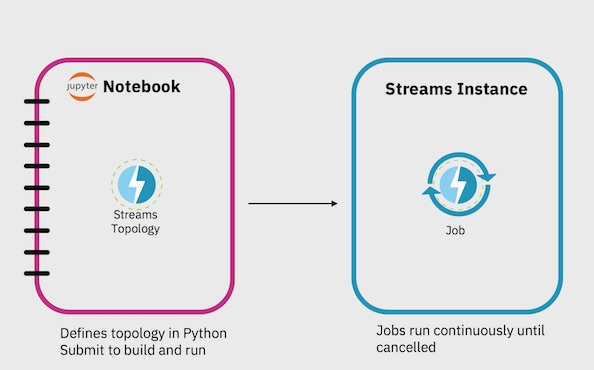


## Documentation
    
- [Streams Python development guide](https://ibmstreams.github.io/streamsx.documentation/docs/latest/python/)
- [Streams Python API](https://streamsxtopology.readthedocs.io/)



# Prerequisites

This notebook can be used as-is from within an IBM Cloud Pak for Data project. 

If you are not running this notebook from within IBM Cloud Pak for Data, [follow these steps to make sure you have installed all the prerequisites](https://ibmstreams.github.io/streamsx.documentation/docs/python/1.6/python-appapi-devguide-2/).

<a name="setup"></a>


# 1. Set up a connection to the Streams instance


To submit the application for execution, you have to connect to the Streams instance. The information required to connect to the instance depends on the target installation of Streams. 

Choose the option that matches your development environment.

- **Option 1**: [I'm running the notebook from an IBM Cloud for Data project](#cpd)
- **Option 2**: [I'm using IBM Watson Studio, Jupyter Notebooks, or any other development environment](#notcpd)



<a name="cpd"></a>
### Option 1: Connect to a Streams instance from an IBM Cloud Pak for Data  project

In order to submit a Streams application you need to provide the name of the Streams instance.

1. From the navigation menu, click **Services > Instances**.
2. Update the value of `streams_instance_name` in the cell below according to your Streams instance name
3. Run the cell and skip to section 1.2

The cell below defines a function called `submit_topology` that will be used later on to submit the `Topology` once it is defined.



In [ ]:
from icpd_core import icpd_util
from streamsx.topology import context

streams_instance_name = "sample-streams" ## Change this to Streams instance
try:
    cfg=icpd_util.get_service_instance_details(name=streams_instance_name, instance_type="streams")
except TypeError:
    cfg=icpd_util.get_service_instance_details(name=streams_instance_name)

def submit_topology(topo):
    global cfg
    # Disable SSL certificate verification if necessary
    cfg[context.ConfigParams.SSL_VERIFY] = False
    # Topology wil be deployed as a distributed app
    contextType = context.ContextTypes.DISTRIBUTED
    return context.submit (contextType, topo, config = cfg)

print("Setup complete, continue to section 1.2")

<a name="notcpd"></a>
### Option 2: Connect to a Streams instance from IBM Watson Studio and other environments

*Skip this section if you are running the notebook from a Cloud Pak for Data project.*

The code for each scenario is available in the development guide.  
Each snippet will define a function called `submit_topology` that will be used later on to submit the `Topology` once it is defined.

- Choose the tab that best matches your environment. 
- Copy the code under the heading **Copy this code snippet**.
- Paste it in the cell below.

    [Connection instructions from the development guide](https://ibmstreams.github.io/streamsx.documentation/docs/python/1.6/python-appapi-devguide-2/#connect)


In [ ]:
## Paste snippet from development guide


### 1.2 Import  the `streamsx` package and verify the package version

In [ ]:
import streamsx.topology.context
print("INFO: streamsx package version: " + streamsx.topology.context.__version__)

#For more details uncomment line below.
#!pip show streamsx

<a id="create"></a>
# 2. Create the application

In [ ]:
#create topology...change the name to something more meaningful
from streamsx.topology.topology import Topology
import streamsx.topology.context

topo = Topology(name="BasicTemplate", namespace="sample")

In [ ]:
# add stream...delete and replace this with your streams and analytics
# this is added so the topology will run (needs a source)
# produces a random integer between 1 and 100 every tenth of a second
import random, time
def readings():
    while True:
        time.sleep(0.1)
        yield random.randint(1,100)

source = topo.source(readings)

# create a view to watch the stream data while running
source_view = source.view(name="RandomIntegers", description="Random integers from source stream")

<a id="launch"></a>
# 3. Submit the application
A running Streams application is called a *job*. By submitting the topology we create a job.

In [ ]:
# The submission_result object contains information about the running application, or job
print("Submitting Topology to Streams for execution..")
submission_result = submit_topology(topo)

if submission_result.job:
  streams_job = submission_result.job
  print ("JobId: ", streams_job.id , "\nJob name: ", streams_job.name)
else:
  print("Submission failed: "   + str(submission_result))

<a name="view"></a>
# 4. Use a `View` to access data from the job
Now that the job is started, use the `View` object to start retrieving data from a `Stream`.

In [ ]:
#show 30 seconds of data
if submission_result.job:
    queue = source_view.start_data_fetch()
    timeSpan = time.time() + 30;
    while time.time() < timeSpan:
        print(queue.get(timeout=60))
    source_view.stop_data_fetch()


<a name="cancel"></a>

# 5. Cancel the job

The Streams job is running in the Streams service. You can cancel it within the notebook or delete it from **Projects** > **Jobs**.

In [ ]:
# cancel the job directly using the Job object
submission_result.cancel_job_button()
# or, use 
# streams_job.cancel()